# **FINAL PROJECT MACHINE LEARNING APPLICATIONS**

------------------------------------------------------
Group participants:
*   *Claudia Sánchez Merino 100475131*
*   *Irina Vela Gómez 100454302*
*   *Mónica Martín Herguedas 100474845*
*   *Lucía Fernández Alba 100475223*




------------------------------------------------------

In this project, we will use the knowledge and techniques acquired during the course to solve a machine learning task on text documents. Our idea was to analyze people's dreams as they offer a unique lens into the subconscious mind, emotions, memory, and imagination. By applying NLP and ML techniques, we can discover hidden patterns and relationships of them that might not be visible at first glance.

This notebook contains the following parts:

1.   Natural Language Processing and text vectorization
2.   Machine Learning: Classification & Clustering

In [1]:
#If using colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
%pip install contractions
%pip install gensim


!pip cache purge
!pip uninstall -y numpy
!pip install numpy gensim
!pip install numpy==1.23.5
!pip install gensim==4.3.0


Files removed: 42
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 61.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
^C


# **0 . Prepare and load the data**

In [2]:
!pip install pandas
import pandas as pd
ruta = '/content/drive/MyDrive/ML_apps/' #iri
#ruta = '/content/drive/MyDrive/ML_apps/' #claudia
#ruta = '/content/drive/MyDrive/ML_apps/' #lucia
#ruta = '' #monica



In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA

# Loading the dataset
#df = pd.read_csv('dream.csv')
df = pd.read_csv(ruta + 'dream.csv')

df = df.drop(['cluster', 'name'], axis=1)


# One-hot encoding the 'gender' column (converts categorical values into binary columns)
df_gender = pd.get_dummies(df['gender'], prefix='gender')



# Function to extract emotions from the 'emotion' column
def extract_emotion(text):
    if not isinstance(text, str):
        return np.nan
    matches_d = re.findall(r'\b(AN|AP|SD|CO|HA)\s*D\b', text)

    if matches_d:
        return matches_d[0]
    match_any = re.search(r'\b(AN|AP|SD|CO|HA)\b', text)
    if match_any:
        return match_any.group(1)
    return 'CO'

# Applying the extract_emotion function to the 'emotion' column
df['emotion_feature'] = df['emotion'].apply(extract_emotion).apply(pd.Series)

# Function to extract the start year from the 'time' column
def extract_start_year(time_str):
    if not isinstance(time_str, str):
        return np.nan

    # Regular expressions for different time formats
    range_match = re.search(r'^(\d{4})-', time_str)
    single_year = re.search(r'^(\d{4})$', time_str)
    mid_match = re.search(r'mid-(\d{4})s', time_str)

    if range_match:
        return int(range_match.group(1))
    elif single_year:
        return int(single_year.group(1))
    elif mid_match:
        return int(mid_match.group(1))

    return np.nan

# Applying the extract_start_year function to the 'time' column
df['start_year'] = df['time'].apply(extract_start_year)
df['start_year'].fillna(df['start_year'].median(), inplace=True)

# Combining the processed columns into a final DataFrame
df_processed = pd.concat([
    df[['id', 'number', 'report', 'start_year', 'length', 'age', 'emotion_feature']],
    df_gender,
], axis=1)

# Saving the processed DataFrame to a new CSV file
df_processed.to_csv('dream_for_ml.csv', index=False)

# Printing information about the processed dataset
print("\n--- Processed dataset information ---")
print("Final dataset dimensions:", df_processed.shape)
print("Available columns:", df_processed.columns.tolist())


<ipython-input-3-fce187097bb5>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['start_year'].fillna(df['start_year'].median(), inplace=True)



--- Processed dataset information ---
Final dataset dimensions: (4000, 9)
Available columns: ['id', 'number', 'report', 'start_year', 'length', 'age', 'emotion_feature', 'gender_F', 'gender_M']


In [4]:
df = pd.read_csv('dream_for_ml.csv')

In [5]:
df.head()

,id,number,report,start_year,length,age,emotion_feature,gender_F,gender_M
0,david,8,"It was nighttime, and cold; I could see my bre...",1990,78,T,AN,False,True
1,b,0312,"I'm in some strange place, like a carnival or ...",1960,318,YA,HA,True,False
2,van,087,"I remember these dreams in continuity, but onl...",2007,290,A,HA,False,True
3,izzy-all,1693,I had gotten this dog and it was at Nana's. I ...,2003,224,TY,SD,True,False
4,merri,266,I was sitting on a hill trying to fix the lawn...,1999,664,A,AP,True,False


In [6]:
# Counting the occurrences of each unique emotion in the 'emotion_feature' column, to check the balance
emotion_counts = df['emotion_feature'].value_counts()

# Calculating the percentage of each emotion in the dataset
emotion_percentages = (emotion_counts / len(df)) * 100

print("Emotion Percentage")
print(emotion_percentages.round(2))

Emotion Percentage
emotion_feature
AP    33.30
HA    18.98
CO    18.90
AN    18.22
SD    10.60
Name: count, dtype: float64


# 1 . Natural Language Processing and text vectorization




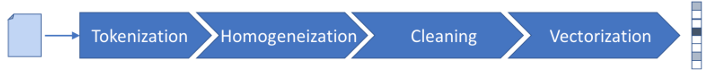

In [7]:
!pip install matplotlib
!pip install seaborn

In [7]:
# Text preprocessing
import re
import string
import contractions
import nltk
import spacy

# Tokenization & normalization
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Data handling
import pandas as pd
import numpy as np
from collections import Counter


# Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Topic modeling with Gensim
#!pip install gensim
import gensim
from gensim.models import Word2Vec, Doc2Vec, LdaModel
from gensim.models.doc2vec import TaggedDocument
from gensim.models.coherencemodel import CoherenceModel

# Topic visualization
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## **Step 1:**  Text preprocessing with Spacy.
In this step, we implement a complete text preprocessing pipeline. The main phases of the pipeline are:

####   1. Text Wrangling
First, we fix contractions (for example, "can't" becomes "cannot") to make the text easier to process.
The text is not in HTML format, so no transformation is needed in that regard.
There are no links present in the data.
We also remove dates that appear inside parentheses (e.g., "(12/05/23)") and eliminate unwanted symbols such as brackets, quotes, and parentheses.

#### 2. Tokenization
We tokenize the text by words rather than by phrases or sentences, as word-level tokenization is more appropriate for our thematic analysis.
Each token will represent a single word.

#### 3. Homogenization
In this phase, we transform all tokens to lowercase to ensure uniformity.
We also apply lemmatization using SpaCy, which reduces words to their base or dictionary form (e.g., "running" becomes "run").

#### 4. Cleaning
Finally, we remove very common English words (stopwords), such as "the", "and", "is", which do not contribute meaningful information to the analysis.

In [8]:
#load English model from SpaCy
print("Loading SpaCy model...")
try:
    nlp = spacy.load('en_core_web_md')
except:
    print("Downloading English model for SpaCy...")
    spacy.cli.download('en_core_web_md')
    nlp = spacy.load('en_core_web_md')


def remove_date_in_parentheses(text):
    if not isinstance(text, str):
        text = str(text)
    pattern = r'\(\d{2}/\d{2}/\d{2}\)'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

def remove_symbols(text):
    cleaned_text = re.sub(r'[\[\]\"()]', '', text)
    return cleaned_text

def clean_text_before_spacy(text):
    #contractions
    text = contractions.fix(text)

    #remove dates inside parentheses
    text = remove_date_in_parentheses(text)

    #remove unwanted symbols
    text = remove_symbols(text)

    #Lowercase the text
    text = text.lower()

    return text


def preprocess_text(text):
    """
    Function to preprocess text using SpaCy
    """
    #clean the text
    text = clean_text_before_spacy(text)

    #processing with SpaCy
    doc = nlp(text)

    #filtered tokens: only words that are not stopwords, are alphabetic,
    # and are nouns, verbs, adjectives or adverbs
    tokens = [token.lemma_ for token in doc
              if not token.is_stop
              and token.is_alpha
              and token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']]

    return " ".join(tokens)

#apply preprocessing to the texts
df['processed_text'] = df['report'].apply(preprocess_text)

#review preprocessing results
print("\nComparison of original vs preprocessed texts:")
for i in range(min(3, len(df))):
    print(f"\nOriginal: {df['report'].iloc[i][:100]}...")
    print(f"Processed: {df['processed_text'].iloc[i][:100]}...")

#save tokenized texts for later use
df['tokenized_text'] = df['processed_text'].apply(lambda x: x.split())

Loading SpaCy model...

Comparison of original vs preprocessed texts:

Original: It was nighttime, and cold; I could see my breath. I was an outcast because the friends I had chosen...
Processed: nighttime cold breath outcast friend choose socially acceptable condemn walk grass concrete unknown ...

Original: I'm in some strange place, like a carnival or a party. There are lots of people. Tricks are played o...
Processed: strange place carnival party lot people trick play dangerous overtone bad taste crowd man son give a...

Original: I remember these dreams in continuity, but only relative to each other. When I think deep enough abo...
Processed: remember dream continuity relative think deep trigger association one remember recent dream tend rem...


In [9]:
df.head()

,id,number,report,start_year,length,age,emotion_feature,gender_F,gender_M,processed_text,tokenized_text
0,david,8,"It was nighttime, and cold; I could see my bre...",1990,78,T,AN,False,True,nighttime cold breath outcast friend choose so...,"[nighttime, cold, breath, outcast, friend, cho..."
1,b,0312,"I'm in some strange place, like a carnival or ...",1960,318,YA,HA,True,False,strange place carnival party lot people trick ...,"[strange, place, carnival, party, lot, people,..."
2,van,087,"I remember these dreams in continuity, but onl...",2007,290,A,HA,False,True,remember dream continuity relative think deep ...,"[remember, dream, continuity, relative, think,..."
3,izzy-all,1693,I had gotten this dog and it was at Nana's. I ...,2003,224,TY,SD,True,False,get dog go day lady poppa mom get bed poppa ch...,"[get, dog, go, day, lady, poppa, mom, get, bed..."
4,merri,266,I was sitting on a hill trying to fix the lawn...,1999,664,A,AP,True,False,sit hill try fix lawnmower keep trace shape et...,"[sit, hill, try, fix, lawnmower, keep, trace, ..."


## **Step 2:**  Text vectorization.

In this stage we will analyze the following
vectorization schemes:
*   Classical BoW or TF-IDF representation.
*   Word2vec/Glove based representation or Doc2Vec vectorization
*   Extraction of themes and vector representation of the documents
using the LDA algorithm.


### 1. Classical vectorization: BoW and TF-IDF

In this section, we apply two basic text vectorization techniques:
- **Bag of Words (BoW)**: transforms text into a matrix of word counts.
- **TF-IDF (Term Frequency - Inverse Document Frequency)**: transforms text into a matrix reflecting the importance of words across the dataset.

We wanted to study both techniques, as, our dataset is a collection of stories with potentially varying themes and vocabulary. They two are useful for identifying the general trends (via BoW) and the more unique, important terms (via TF-IDF), allowing us to explore different perspectives of the data

In [11]:
print("\nApplying BoW and TF-IDF vectorization...")

bow_vectorizer = CountVectorizer(max_features=5000) #We are limiting to the 5000 most freq. words
bow_matrix = bow_vectorizer.fit_transform(df['processed_text'])

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

print(f"BoW matrix dimensions: {bow_matrix.shape}")
print(f"TF-IDF matrix dimensions: {tfidf_matrix.shape}")

bow_sums = bow_matrix.sum(axis=0).A1
vocabulary = bow_vectorizer.get_feature_names_out()

common_words = list(zip(vocabulary, bow_sums))
common_words = sorted(common_words, key=lambda x: x[1], reverse=True)

tfidf_sums = tfidf_matrix.sum(axis=0).A1
vocab_tfidf = tfidf_vectorizer.get_feature_names_out()

tfidf_words = list(zip(vocab_tfidf, tfidf_sums))
tfidf_words = sorted(tfidf_words, key=lambda x: x[1], reverse=True)



Applying BoW and TF-IDF vectorization...
BoW matrix dimensions: (4000, 5000)
TF-IDF matrix dimensions: (4000, 5000)


Let´s visualize the 20 most common words for BoW and TF-IDF

<ipython-input-12-ebea2de8ea8d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


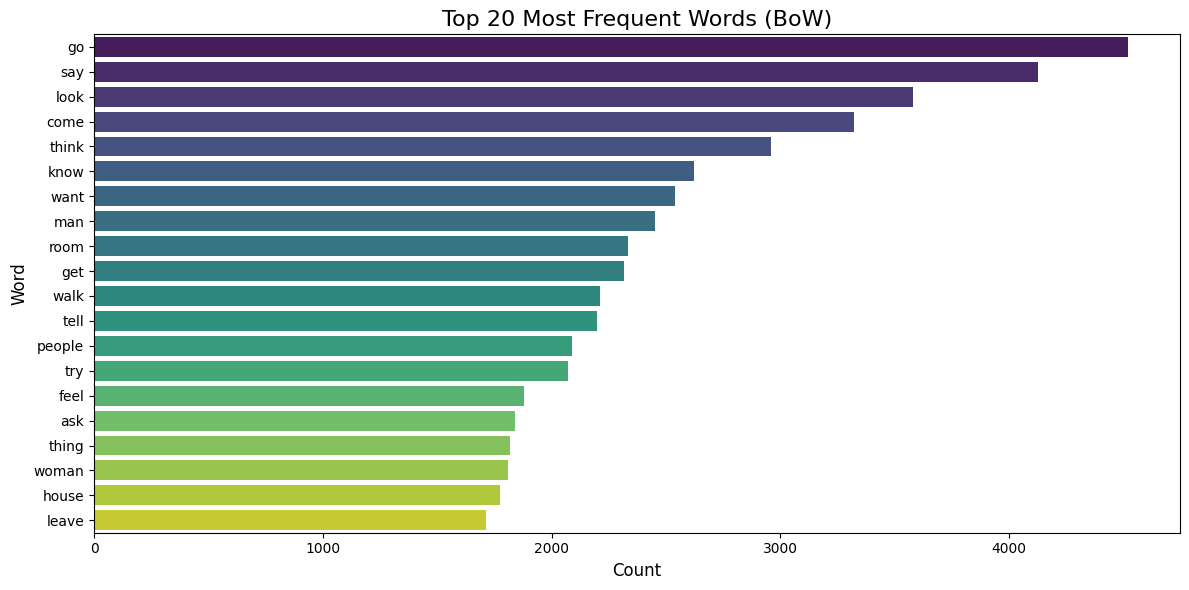

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

top_words = common_words[:20]
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 20 Most Frequent Words (BoW)", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-13-fb91735f61d9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores), y=list(words), palette="crest")


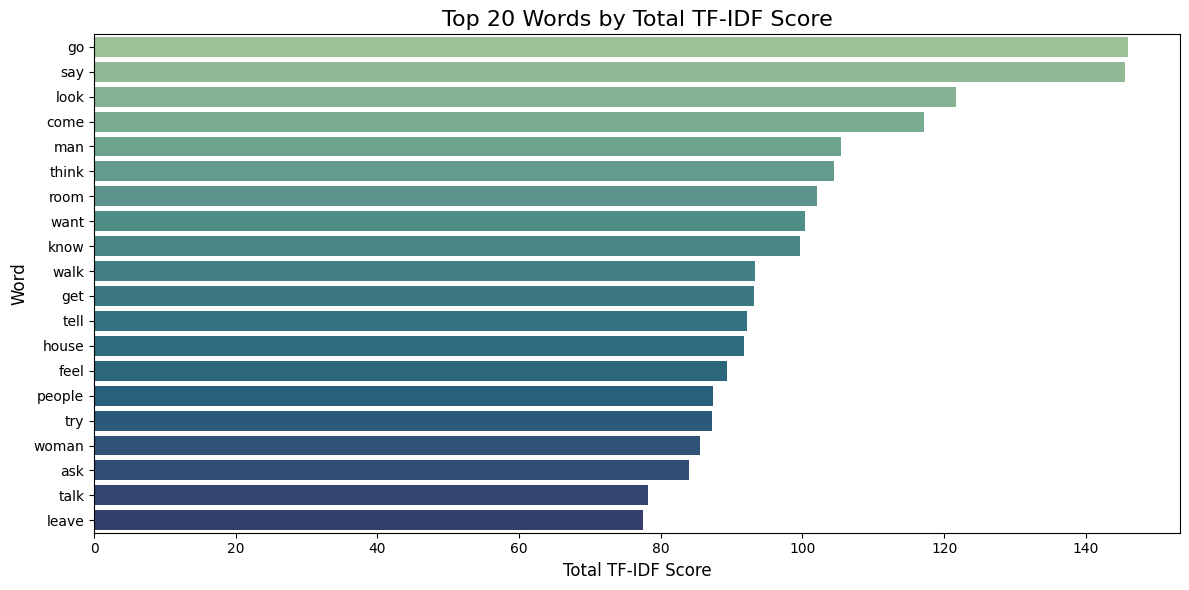

In [13]:

top_tfidf_words = tfidf_words[:20]
words, scores = zip(*top_tfidf_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(scores), y=list(words), palette="crest")
plt.title("Top 20 Words by Total TF-IDF Score", fontsize=16)
plt.xlabel("Total TF-IDF Score", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.tight_layout()
plt.show()


The BoW method counts the raw frequency of each word in the documents, and the resulting matrix shows how often words like "go" or "say" appear across the entire corpus. In comparison, TF-IDF adjusts these frequencies by weighing the importance of each word, considering both its frequency in a document and how common it is across the corpus. As a result, common words such as "go" are slightly downweighted in TF-IDF, but still remain highly frequent. Despite this, the overall difference between BoW and TF-IDF is not drastic in this case. Many words, including "go", still appear as the most frequent across both methods, with only a slight change in the numerical values. This suggests that for this particular corpus, the distinction between these two methods may not be as significant as expected. Both BoW and TF-IDF are simple and effective techniques for text representation, but they are limited in their ability to capture deeper semantic relationships or context between words. So, let´s keep working with more and more powerful methods

### 2. Word2Vec and Doc2Vec
In this section, we will train two popular word embedding models: Word2Vec and Doc2Vec. These models represent words (or documents) as dense vectors in a continuous vector space, capturing semantic relationships between words or documents.

1. **Word2Vec**:
The Word2Vec model learns vector representations of words based on their context. It considers a fixed-size window of surrounding words in a sentence to predict the target word. We will train the model using the tokenized texts in the dataset, with the vectors having 100 dimensions. After training, we compute a document vector by averaging the word vectors for each document.

2. **Doc2Vec**:
Doc2Vec extends the idea of Word2Vec to entire documents by associating a unique vector with each document. This vector is trained alongside the word vectors, capturing the semantic meaning of the entire document. We train the model using the same tokenized texts, then use it to infer a vector representation for each document.

Word2Vec and GloVe are ideal for tasks where understanding word-level patterns, such as clustering or word similarity. On the other hand, Doc2Vec is particularly useful for tasks like document classification, clustering, or comparing the overall meaning and themes of stories. We are going to implement both of them, as they will be useful in future parts of the project.


In [14]:

w2v_model = Word2Vec(
    sentences=df['tokenized_text'],
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

def document_vector(word_list, model):
    """
    Creates a document vector by averaging word vectors
    """
    words = [word for word in word_list if word in model.wv.key_to_index]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(model.vector_size)

document_vectors_w2v = df['tokenized_text'].apply(lambda x: document_vector(x, w2v_model))
w2v_matrix = np.vstack(document_vectors_w2v.values)

tagged_data = [TaggedDocument(words=text, tags=[str(i)])
               for i, text in enumerate(df['tokenized_text'])]

d2v_model = Doc2Vec(vector_size=100,
                    min_count=2,
                    epochs=30,
                    workers=4)
d2v_model.build_vocab(tagged_data)
d2v_model.train(tagged_data,
                total_examples=d2v_model.corpus_count,
                epochs=d2v_model.epochs)

document_vectors_d2v = [d2v_model.infer_vector(text) for text in df['tokenized_text']]
d2v_matrix = np.vstack(document_vectors_d2v)

print(f"Word2Vec matrix dimensions: {w2v_matrix.shape}")
print(f"Doc2Vec matrix dimensions: {d2v_matrix.shape}")


Word2Vec matrix dimensions: (4000, 100)
Doc2Vec matrix dimensions: (4000, 100)


###3. LDA algorithm

In this section, we explore Latent Dirichlet Allocation (LDA) as a method for thematic analysis. Unlike previous vectorization techniques such as Word2Vec or Doc2Vec, which produce numerical embeddings for downstream tasks, LDA focuses on uncovering the latent topics present across the document collection. This allows us to identify dominant themes within the dataset and examine them.


Preparing data for LDA...
Calculating coherence for different numbers of topics...

Optimal number of topics according to coherence: 20
Training final LDA model with 20 topics...

Topics found by LDA:
Topic 0: 0.050*"game" + 0.036*"play" + 0.034*"team" + 0.026*"ball" + 0.020*"player" + 0.017*"patio" + 0.017*"coach" + 0.016*"basketball" + 0.013*"cigarette" + 0.011*"smoke"
Topic 1: 0.014*"look" + 0.011*"door" + 0.011*"go" + 0.010*"know" + 0.009*"room" + 0.009*"think" + 0.008*"sit" + 0.008*"people" + 0.008*"man" + 0.008*"walk"
Topic 2: 0.014*"snake" + 0.012*"say" + 0.011*"room" + 0.009*"run" + 0.009*"come" + 0.008*"guy" + 0.008*"house" + 0.007*"kill" + 0.007*"door" + 0.007*"start"
Topic 3: 0.031*"friend" + 0.017*"feeling" + 0.016*"go" + 0.015*"dream" + 0.013*"character" + 0.012*"happy" + 0.012*"setting" + 0.011*"thought" + 0.011*"school" + 0.010*"get"
Topic 4: 0.022*"test" + 0.012*"soup" + 0.010*"football" + 0.008*"find" + 0.007*"take" + 0.007*"exam" + 0.007*"school" + 0.007*"german" + 0

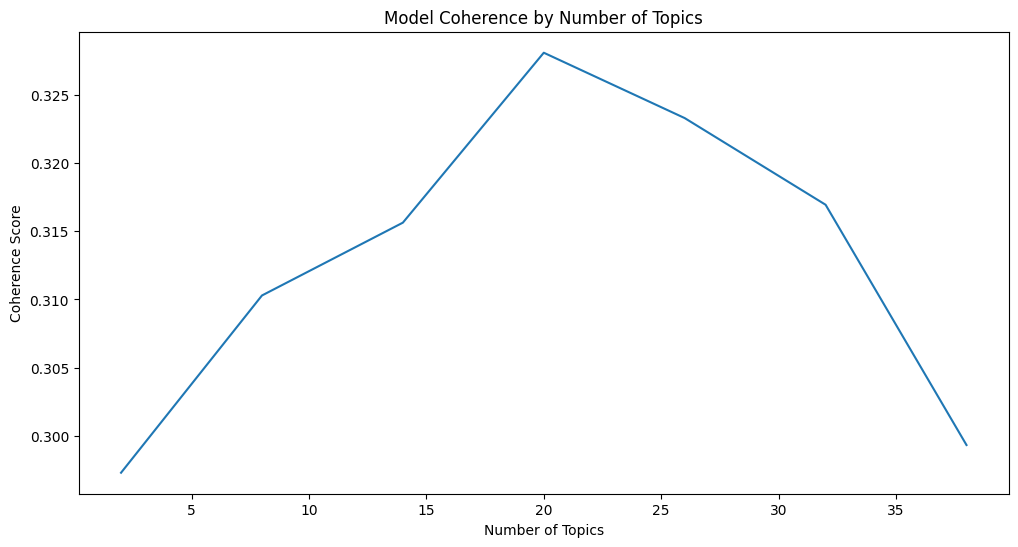

In [15]:
print("\nPreparing data for LDA...")

# Create a dictionary and corpus for Gensim
dictionary = gensim.corpora.Dictionary(df['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in df['tokenized_text']]

# Function to find the optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute coherence for various numbers of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=42,
                         passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

print("Calculating coherence for different numbers of topics...")
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus,
                                                        texts=df['tokenized_text'],
                                                        start=2, limit=40, step=6)

x = range(2, 40, 6)
plt.figure(figsize=(12, 6))
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Model Coherence by Number of Topics")
plt.savefig('lda_coherence.png')

optimal_model_index = coherence_values.index(max(coherence_values))
optimal_num_topics = x[optimal_model_index]
print(f"\nOptimal number of topics according to coherence: {optimal_num_topics}")

print(f"Training final LDA model with {optimal_num_topics} topics...")
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=optimal_num_topics,
                     random_state=42,
                     passes=10)

print("\nTopics found by LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

print("Creating document vectors with LDA...")
lda_vectors = []
for doc in corpus:
    topic_probs = lda_model.get_document_topics(doc, minimum_probability=0)
    topic_probs = sorted(topic_probs, key=lambda x: x[0])
    probs = [prob for _, prob in topic_probs]
    lda_vectors.append(probs)

lda_matrix = np.array(lda_vectors)
print(f"LDA matrix dimensions: {lda_matrix.shape}")

# Prepare LDA visualization with pyLDAvis
print("Preparing LDA visualization...")
try:
    lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(lda_vis, 'lda_visualization.html')
    print("LDA visualization saved as 'lda_visualization.html'")
except Exception as e:
    print(f"Error creating LDA visualization: {e}")


The bar plots below display the top words associated with the most prominent topics discovered by the LDA model. For example, Topic 0 is characterized by words such as go, come, run, get, and room, indicating that this topic may be related to actions or movement. Topic 1 features words like school, ask, locker, and student, suggesting a theme centered around educational settings and student activities. Similarly, Topic 2 includes words like oil, bumper, people, and brush. Although this last topic is more abstract, dreams tend to blend objects, people, and situations in a non-linear and often surreal manner, which explains the appearance of these terms.

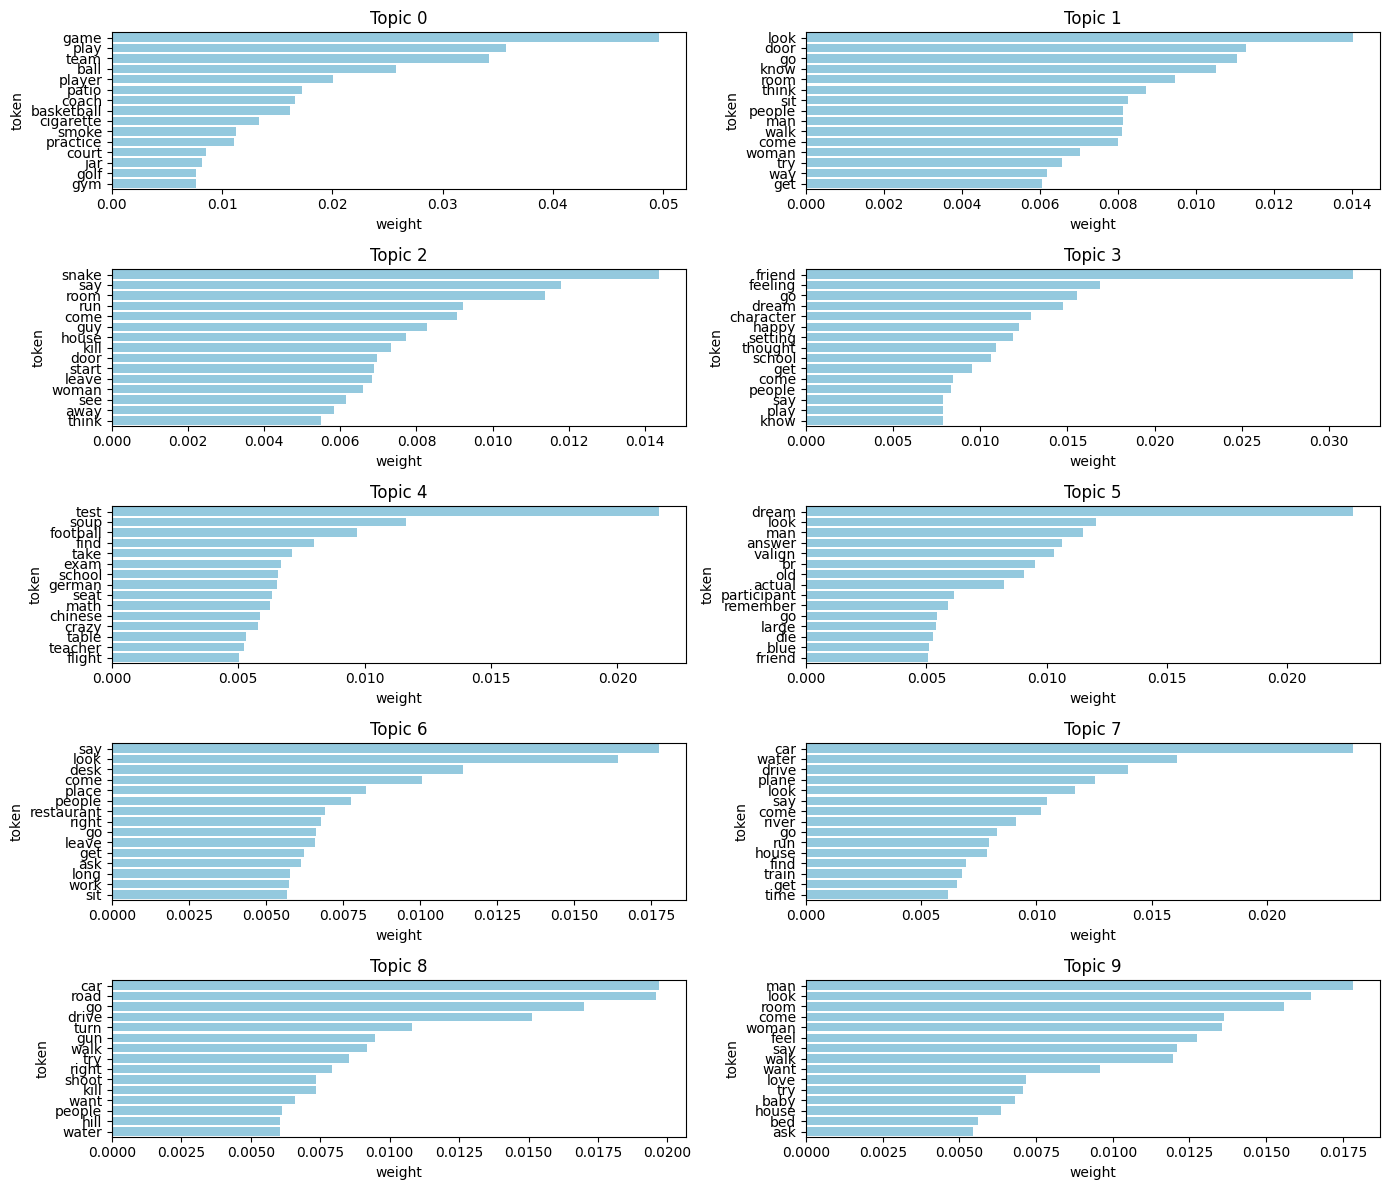

In [16]:
topn = 15
n_display = min(optimal_num_topics, 10)
fig, axes = plt.subplots(nrows=(n_display + 1)//2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i in range(n_display):
    topic_data = lda_model.show_topic(i, topn=topn)
    df_topic = pd.DataFrame(topic_data, columns=["token", "weight"])
    sns.barplot(x="weight", y="token", data=df_topic, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Topic {i}")
plt.tight_layout()
plt.savefig("lda_topic_bars.png")


 # **2 . Machine Learning**

## **2.1  Classification**

We are going to use 3 different classifiers to evaluate the model’s performance on the dataset. These classifiers are: Logistic Regression, Random Forest, and Support Vector Machine (SVM). Logistic Regression is easy to interpret, making it useful as a baseline for comparison with other models. Random Forest is a decision tree-based model that is robust to overfitting and can handle nonlinear relationships, while SVM is effective in high-dimensional spaces and is capable of finding an optimal margin to separate classes.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize

In [18]:
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, size=100, window=5, min_count=2):
        self.size = size
        self.window = window
        self.min_count = min_count

    def fit(self, X, y=None):
        tokenized = [doc.split() for doc in X]
        self.model = Word2Vec(sentences=tokenized, vector_size=self.size,
                              window=self.window, min_count=self.min_count)
        return self

    def transform(self, X, y=None):
        tokenized = [doc.split() for doc in X]
        return np.array([
            np.mean([self.model.wv[word] for word in words if word in self.model.wv]
                    or [np.zeros(self.size)], axis=0)
            for words in tokenized
        ])

class Doc2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, size=100, window=5, min_count=2, epochs=30):
        self.size = size
        self.window = window
        self.min_count = min_count
        self.epochs = epochs

    def fit(self, X, y=None):
        self.documents = [TaggedDocument(words=doc.split(), tags=[i]) for i, doc in enumerate(X)]
        self.model = Doc2Vec(vector_size=self.size, window=self.window,
                             min_count=self.min_count, epochs=self.epochs)
        self.model.build_vocab(self.documents)
        self.model.train(self.documents, total_examples=self.model.corpus_count, epochs=self.epochs)
        return self

    def transform(self, X, y=None):
        return np.array([self.model.infer_vector(doc.split()) for doc in X])


In [19]:
class LDAVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, num_topics=10, max_features=2500):
        self.num_topics = num_topics
        self.max_features = max_features

    def fit(self, X, y=None):
        self.vectorizer = CountVectorizer(max_features=self.max_features)
        X_counts = self.vectorizer.fit_transform(X)
        self.lda = LatentDirichletAllocation(n_components=self.num_topics, random_state=42)
        self.lda.fit(X_counts)
        return self

    def transform(self, X, y=None):
        X_counts = self.vectorizer.transform(X)
        return self.lda.transform(X_counts)


In [21]:
# Dense transformer to convert sparse matrices for LDA
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.toarray()


# Classifiers to be tested
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}


param_grid = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
    'Random Forest': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [10, 20]},
    'SVM': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
}


#Vectorization techniques
vectorizers1 = {
    'BoW': CountVectorizer(max_features=2500),
    'TF-IDF': TfidfVectorizer(max_features=2500)
}
vectorizers2 = {
    'Word2Vec': Word2VecVectorizer(size = 100),
    'Doc2Vec': Doc2VecVectorizer(size = 100)
}
vectorizers3 = {
    'LDA': LDAVectorizer(num_topics=10)
}

# Prepare data and split
X = df['processed_text']
y = df['emotion_feature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Results storage
results1 = []
results2 = []
results3 = []
results1_balanced = []
results2_balanced = []
results3_balanced= []

In [22]:
df.head()

,id,number,report,start_year,length,age,emotion_feature,gender_F,gender_M,processed_text,tokenized_text
0,david,8,"It was nighttime, and cold; I could see my bre...",1990,78,T,AN,False,True,nighttime cold breath outcast friend choose so...,"[nighttime, cold, breath, outcast, friend, cho..."
1,b,0312,"I'm in some strange place, like a carnival or ...",1960,318,YA,HA,True,False,strange place carnival party lot people trick ...,"[strange, place, carnival, party, lot, people,..."
2,van,087,"I remember these dreams in continuity, but onl...",2007,290,A,HA,False,True,remember dream continuity relative think deep ...,"[remember, dream, continuity, relative, think,..."
3,izzy-all,1693,I had gotten this dog and it was at Nana's. I ...,2003,224,TY,SD,True,False,get dog go day lady poppa mom get bed poppa ch...,"[get, dog, go, day, lady, poppa, mom, get, bed..."
4,merri,266,I was sitting on a hill trying to fix the lawn...,1999,664,A,AP,True,False,sit hill try fix lawnmower keep trace shape et...,"[sit, hill, try, fix, lawnmower, keep, trace, ..."


## BoW and TF-IDF

In [ ]:
for vec_name, vectorizer in vectorizers1.items():
    for clf_name, clf in classifiers.items():
        print(f"\n== Evaluating {vec_name} + {clf_name} with LDA ==")

        pipe = Pipeline([
            ('vectorizer', vectorizer),
            ('to_dense', DenseTransformer()),
            ('reducer', LDA(n_components=4)),
            ('classifier', clf)
        ])


        grid_search = GridSearchCV(pipe, param_grid[clf_name], cv=StratifiedKFold(n_splits=4))
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Algunas métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        y_prob = best_model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test_bin, y_prob, average='weighted', multi_class='ovr')

        results1.append({
            'Vectorizer': vec_name,
            'Classifier': clf_name,
            'Best Params': grid_search.best_params_,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Confusion Matrix': conf_matrix,
            'ROC': roc_auc
        })

results_1 = pd.DataFrame(results1)
print("\nResults:")
print(results_1)


== Evaluating BoW + Logistic Regression with LDA ==

== Evaluating BoW + Random Forest with LDA ==

== Evaluating BoW + SVM with LDA ==

== Evaluating TF-IDF + Logistic Regression with LDA ==

== Evaluating TF-IDF + Random Forest with LDA ==

== Evaluating TF-IDF + SVM with LDA ==

Results:
  Vectorizer           Classifier  \
0        BoW  Logistic Regression   
1        BoW        Random Forest   
2        BoW                  SVM   
3     TF-IDF  Logistic Regression   
4     TF-IDF        Random Forest   
5     TF-IDF                  SVM   

                                         Best Params  Accuracy  F1 Score  \
0                             {'classifier__C': 0.1}  0.340833  0.345882   
1  {'classifier__max_depth': 10, 'classifier__n_e...  0.322500  0.321971   
2  {'classifier__C': 1, 'classifier__kernel': 'li...  0.332500  0.337050   
3                             {'classifier__C': 0.1}  0.355833  0.356226   
4  {'classifier__max_depth': 10, 'classifier__n_e...  0.316667  0.3

## Now, using Word2Vector and Doc2Vector

In [ ]:
for vec_name, vectorizer in vectorizers2.items():
    for clf_name, clf in classifiers.items():
        print(f"\n== Evaluating {vec_name} + {clf_name} ==")

        pipe = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', clf)
        ])

        # Grid search
        grid_search = GridSearchCV(pipe, param_grid[clf_name], cv=4)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)

        results2.append({
            'Vectorizer': vec_name,
            'Classifier': clf_name,
            'Best Params': grid_search.best_params_,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Confusion Matrix': conf_matrix
        })
results_2 = pd.DataFrame(results2)
print("\nResults:")
print(results_2)


== Evaluating Word2Vec + Logistic Regression ==

== Evaluating Word2Vec + Random Forest ==

== Evaluating Word2Vec + SVM ==

== Evaluating Doc2Vec + Logistic Regression ==

== Evaluating Doc2Vec + Random Forest ==

== Evaluating Doc2Vec + SVM ==

Results:
  Vectorizer           Classifier  \
0   Word2Vec  Logistic Regression   
1   Word2Vec        Random Forest   
2   Word2Vec                  SVM   
3    Doc2Vec  Logistic Regression   
4    Doc2Vec        Random Forest   
5    Doc2Vec                  SVM   

                                         Best Params  Accuracy  F1 Score  \
0                              {'classifier__C': 10}  0.365833  0.265168   
1  {'classifier__max_depth': 10, 'classifier__n_e...  0.325833  0.240842   
2  {'classifier__C': 0.1, 'classifier__kernel': '...  0.330000  0.163759   
3                             {'classifier__C': 0.1}  0.450833  0.434240   
4  {'classifier__max_depth': 20, 'classifier__n_e...  0.369167  0.278420   
5  {'classifier__C': 1, 'cl

In [ ]:
for vec_name, vectorizer in vectorizers3.items():
    for clf_name, clf in classifiers.items():
        print(f"\n== Evaluating {vec_name} + {clf_name} ==")

        pipe = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', clf)
        ])

        # Grid search
        grid_search = GridSearchCV(pipe, param_grid[clf_name], cv=4)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_prob = best_model.predict_proba(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)

        results3.append({
            'Vectorizer': vec_name,
            'Classifier': clf_name,
            'Best Params': grid_search.best_params_,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Confusion Matrix': conf_matrix
        })
results_3 = pd.DataFrame(results3)
print("\nResults:")
print(results_3)


== Evaluating LDA + Logistic Regression ==

== Evaluating LDA + Random Forest ==

== Evaluating LDA + SVM ==

Results:
  Vectorizer           Classifier  \
0        LDA  Logistic Regression   
1        LDA        Random Forest   
2        LDA                  SVM   

                                         Best Params  Accuracy  F1 Score  \
0                              {'classifier__C': 10}  0.349167  0.230783   
1  {'classifier__max_depth': 10, 'classifier__n_e...  0.341667  0.248002   
2  {'classifier__C': 0.1, 'classifier__kernel': '...  0.330000  0.163759   

    ROC AUC                                   Confusion Matrix  
0  0.612340  [[10, 209, 3, 14, 0], [5, 368, 3, 20, 0], [4, ...  
1  0.589181  [[8, 189, 7, 30, 2], [10, 337, 16, 31, 2], [6,...  
2  0.552758  [[0, 236, 0, 0, 0], [0, 396, 0, 0, 0], [0, 221...  


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Let's take the valid values (only one is true, just to make sure it works properly)
df_gender_valid = df[(df['gender_F'] != df['gender_M'])]

# Features y labels
X = df_gender_valid['report']
y = df_gender_valid['gender_F'].astype(int)  # 1 woman, 0 male

# Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# DenseTransformer (for models RandomForest, SVM)
class DenseTransformer:
    def fit(self, X, y=None): return self
    def transform(self, X): return X.toarray()

results_gender = []

for vec_name, vectorizer in vectorizers1.items():
    for clf_name, clf in classifiers.items():
        print(f"\n== Evaluating {vec_name} + {clf_name} (Binary Gender Classification) ==")

        pipe = Pipeline([
            ('vectorizer', vectorizer),
            ('to_dense', DenseTransformer()),
            ('classifier', clf)
        ])

        # Train
        pipe.fit(X_train, y_train)

        # Predict
        y_pred = pipe.predict(X_test)
        y_prob = pipe.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else y_pred

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)

        # Results
        results_gender.append({
            'Vectorizer': vec_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        })

# Print results
results_gender_df = pd.DataFrame(results_gender)
print("\nResults:")
print(results_gender_df)


== Evaluating BoW + Logistic Regression (Binary Gender Classification) ==

== Evaluating BoW + Random Forest (Binary Gender Classification) ==

== Evaluating BoW + SVM (Binary Gender Classification) ==

== Evaluating TF-IDF + Logistic Regression (Binary Gender Classification) ==

== Evaluating TF-IDF + Random Forest (Binary Gender Classification) ==

== Evaluating TF-IDF + SVM (Binary Gender Classification) ==

Results:
  Vectorizer           Classifier  Accuracy  F1 Score   ROC AUC
0        BoW  Logistic Regression   0.89250  0.928808  0.932132
1        BoW        Random Forest   0.82250  0.892587  0.896506
2        BoW                  SVM   0.80625  0.883195  0.888932
3     TF-IDF  Logistic Regression   0.85875  0.912199  0.936908
4     TF-IDF        Random Forest   0.82625  0.894777  0.923538
5     TF-IDF                  SVM   0.87750  0.922956  0.950534


## **2.2 Clustering**

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import umap.umap_ as umap

### Kmeans
In this section, we perform K-Means clustering to group the dreams based on their themes. The optimal number of clusters is determined using the Elbow Method and the Silhouette Score, and then the K-Means algorithm is applied to categorize the dreams into these clusters.

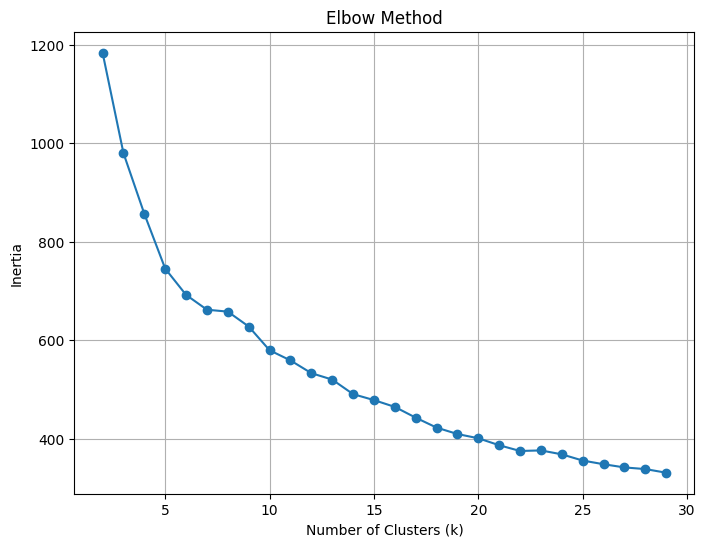

Optimal number of clusters according to elbow method: 2


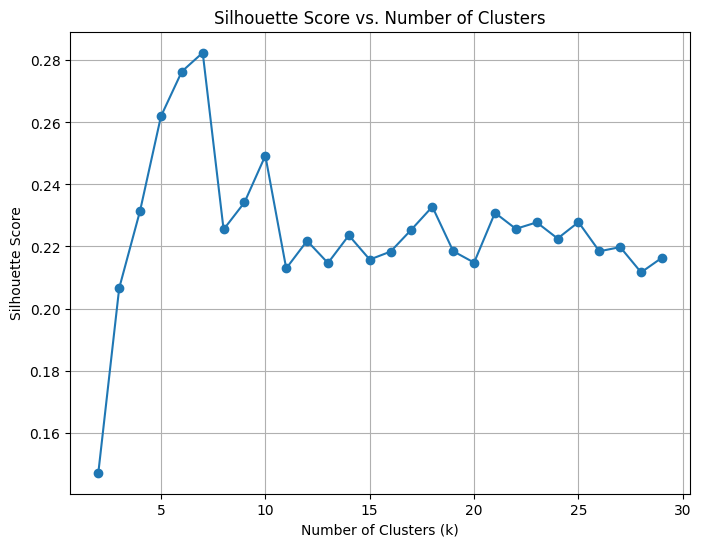

In [24]:
inertia = []
scores = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(lda_matrix)
    inertia.append(kmeans.inertia_)

    labels_k = kmeans.fit_predict(lda_matrix)
    score = silhouette_score(lda_matrix, labels_k)
    scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 30), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

delta_inertia = np.diff(inertia)
k_optimal = np.argmin(delta_inertia) + 2  # +2 because range starts at 2
print(f"Optimal number of clusters according to elbow method: {k_optimal}")

plt.figure(figsize=(8, 6))
plt.plot(range(2, 30), scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [37]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(lda_matrix)

# Get cluster labels for each sample
labels = kmeans.labels_
df['labels'] = labels

In [26]:
# Compute the Davies-Bouldin Index to evaluate clustering quality
db_index = davies_bouldin_score(lda_matrix, labels)
print(f"Davies-Bouldin Index: {db_index:.3f}")

Davies-Bouldin Index: 1.679


### Dimensionality Reduction for Visualization
To visualize the clusters, we apply PCA, t-SNE, and UMAP. These dimensionality reduction techniques reduce the data to 2D or 3D space, helping us visualize the distribution and separation of the clusters, making it easier to interpret the results of K-Means clustering.

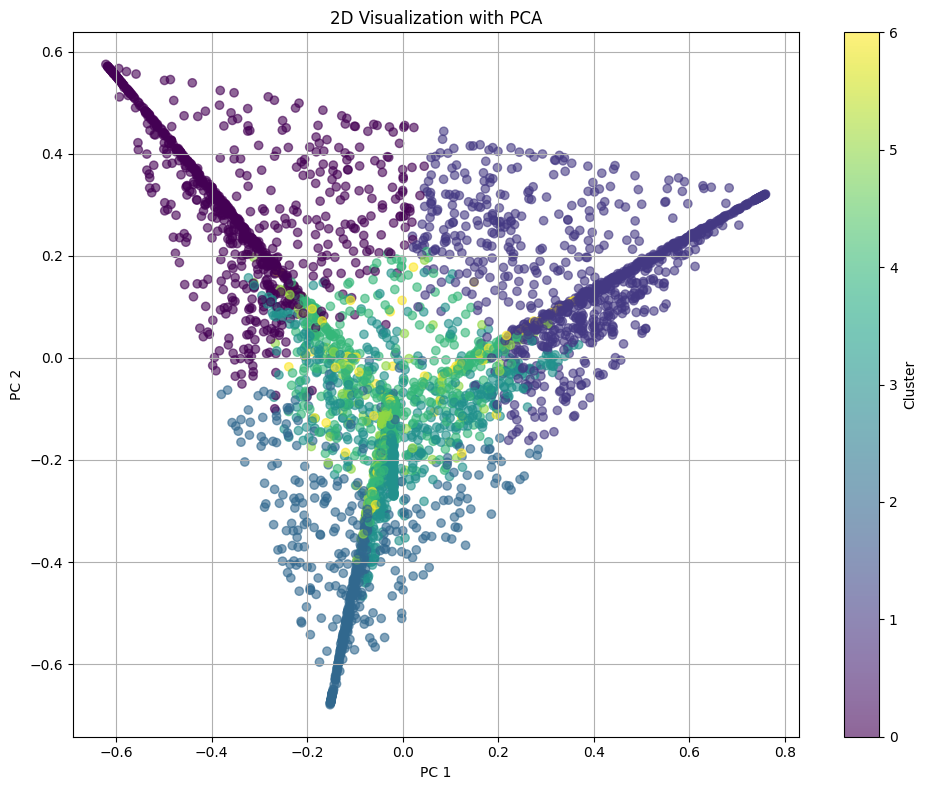

In [27]:
pca = PCA(n_components=2)
lda_pca = pca.fit_transform(lda_matrix)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(lda_pca[:, 0], lda_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('2D Visualization with PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

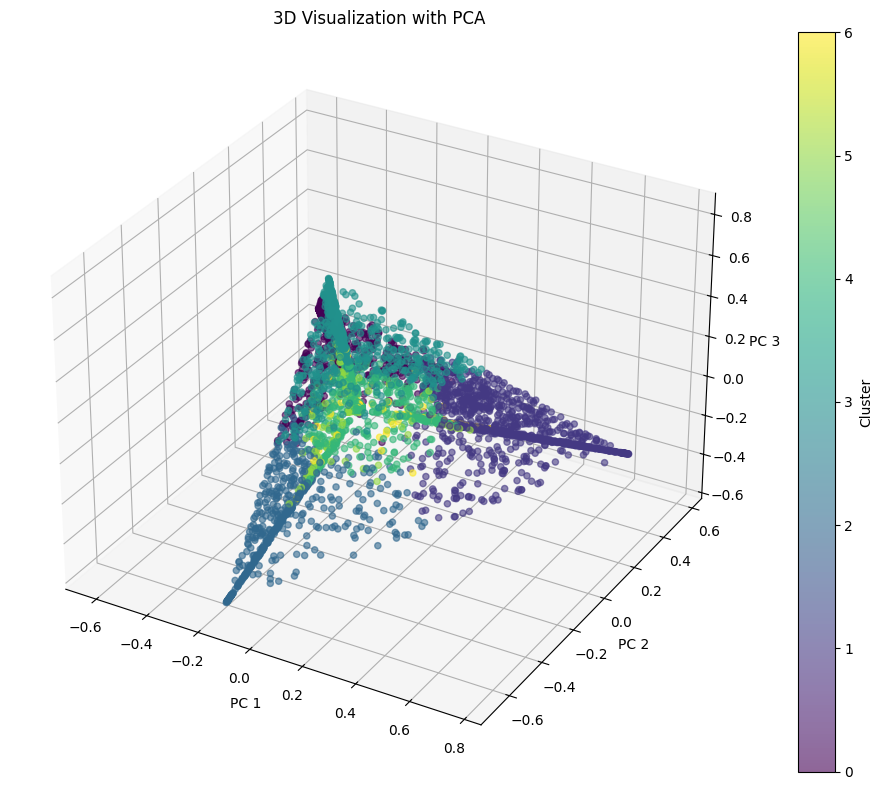

In [28]:
pca = PCA(n_components=3)
lda_pca = pca.fit_transform(lda_matrix)

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    lda_pca[:, 0],
    lda_pca[:, 1],
    lda_pca[:, 2],
    c=labels,
    cmap='viridis',
    alpha=0.6
)

ax.set_title('3D Visualization with PCA')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.tight_layout()
plt.show()

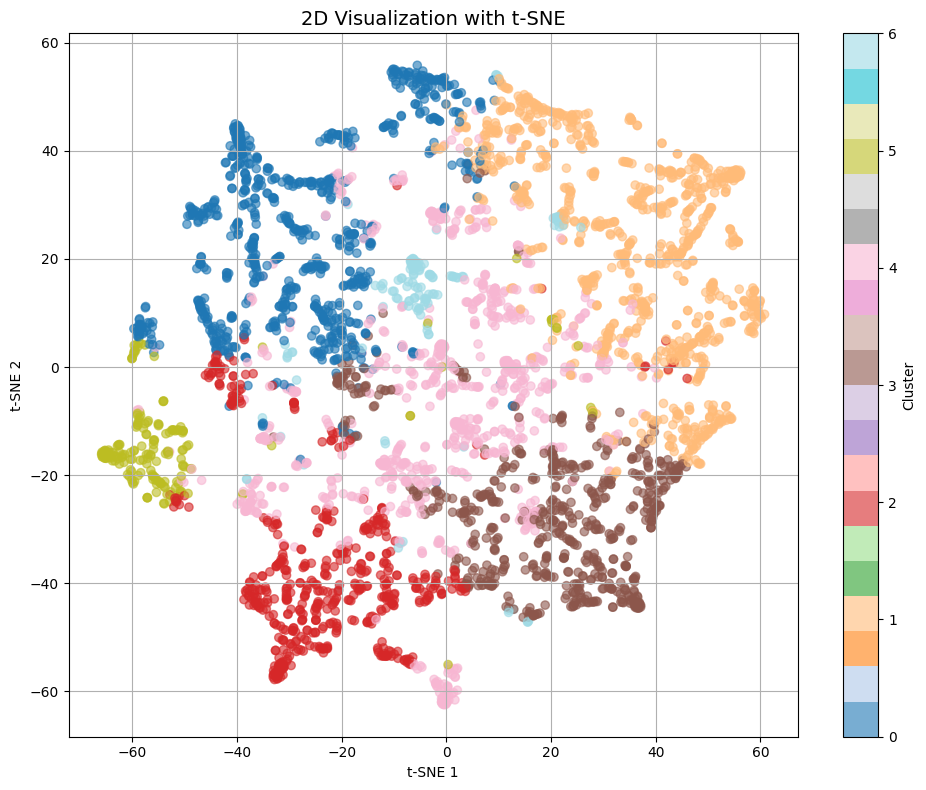

In [29]:
tsne = TSNE(n_components=2, random_state=42)
lda_tsne = tsne.fit_transform(lda_matrix)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(lda_tsne[:, 0], lda_tsne[:, 1], c=labels, cmap='tab20', alpha=0.6)

plt.title('2D Visualization with t-SNE', fontsize=14)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

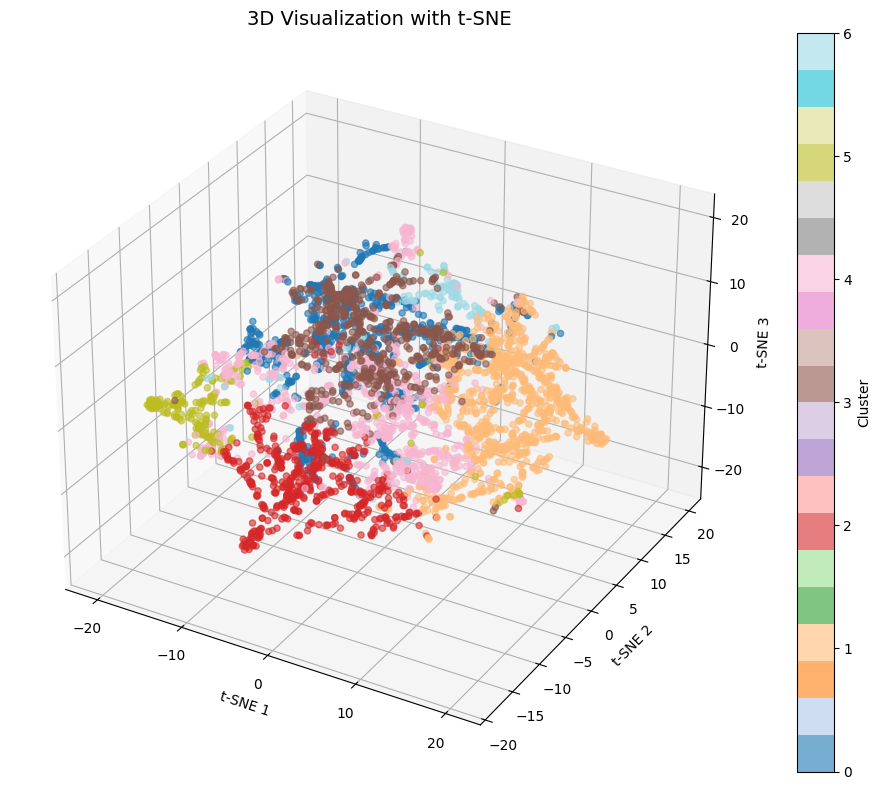

In [30]:
tsne = TSNE(n_components=3, random_state=42)
lda_tsne_3d = tsne.fit_transform(lda_matrix)

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    lda_tsne_3d[:, 0], lda_tsne_3d[:, 1], lda_tsne_3d[:, 2],
    c=labels, cmap='tab20', alpha=0.6
)

ax.set_title('3D Visualization with t-SNE', fontsize=14)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
fig.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


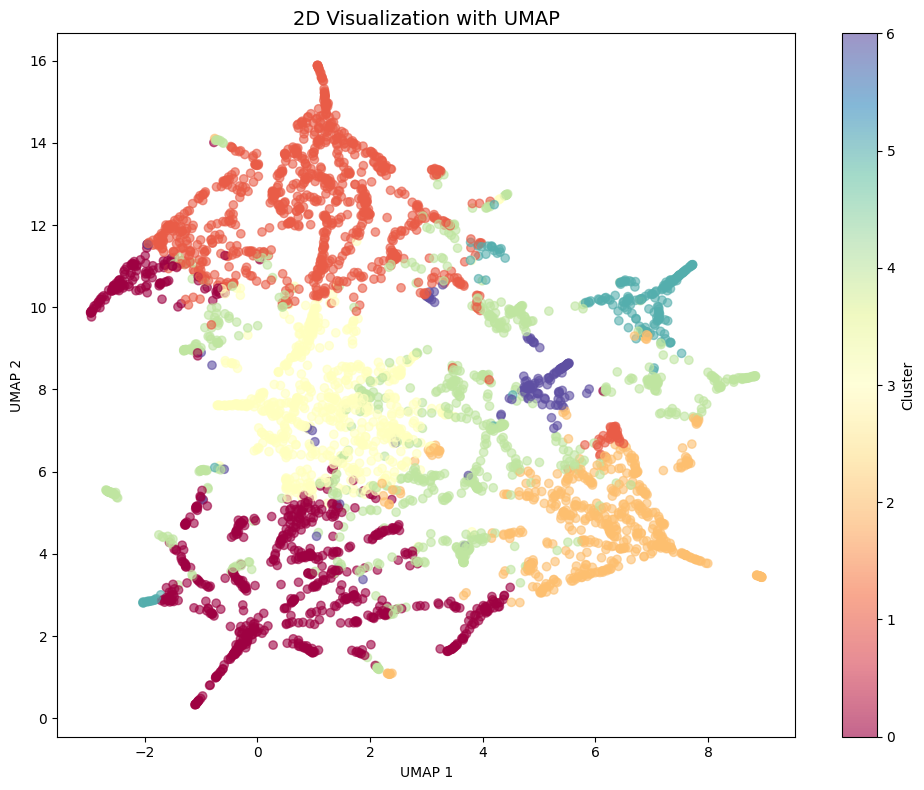

In [31]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(lda_matrix)

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', alpha=0.6)
plt.title('2D Visualization with UMAP', fontsize=14)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


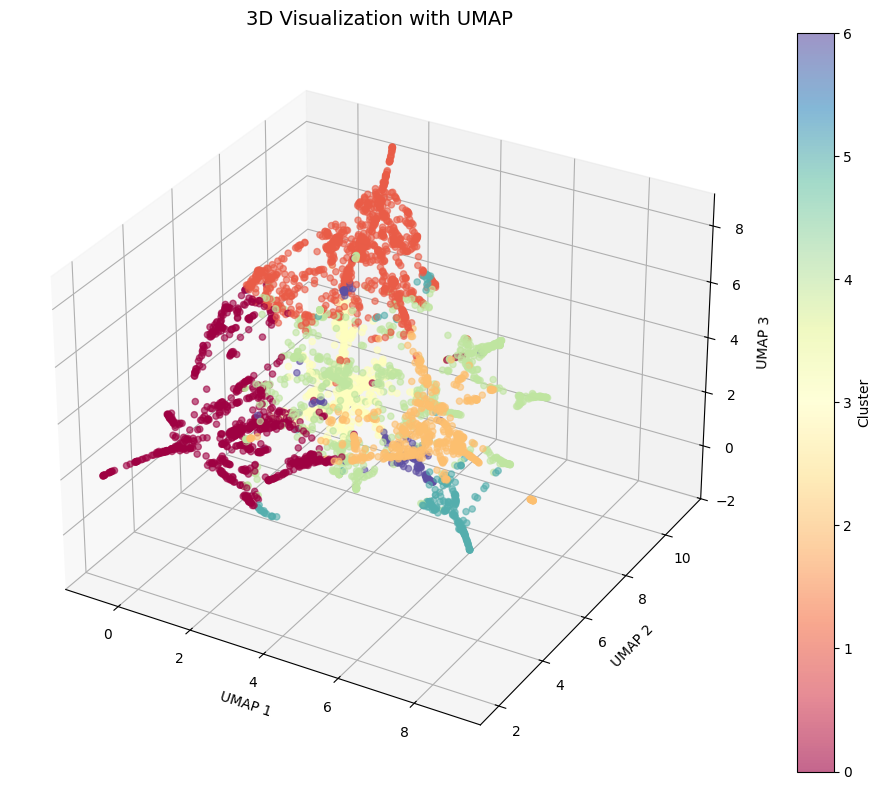

In [32]:
reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(lda_matrix)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    embedding[:, 0], embedding[:, 1], embedding[:, 2],
    c=labels, cmap='Spectral', alpha=0.6
)

ax.set_title('3D Visualization with UMAP', fontsize=14)
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')

fig.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

This plot only assigns colors to each document or 'dream' based on the most dominant topic in its LDA representation. We will use it to make a comparison between the LDA topics and the K-Means clusters, in order to obtain a clearer interpretation of the clusters based on the predominant topics.

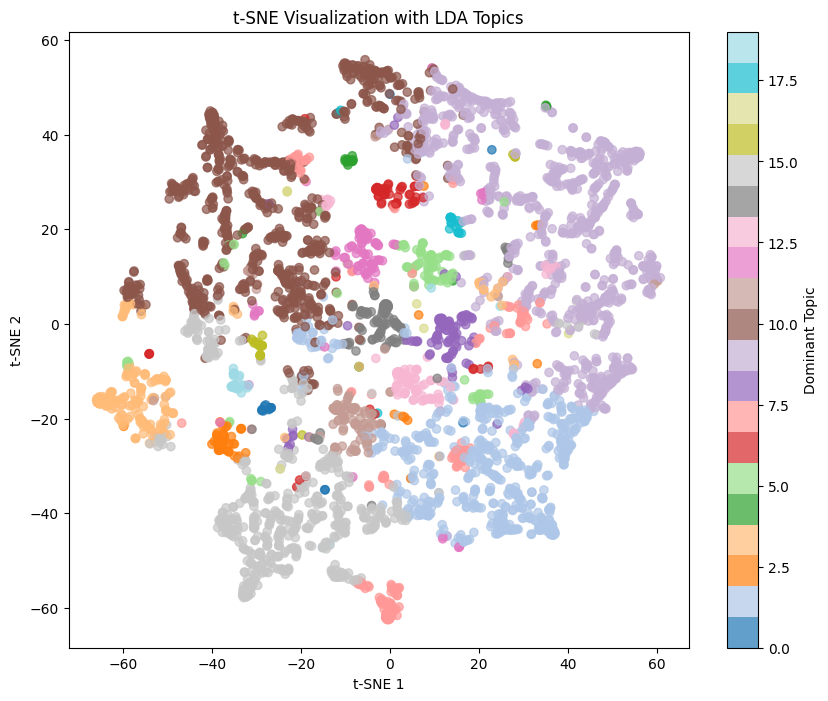

In [38]:
labels_topics_lda = np.argmax(lda_matrix, axis=1)

tsne = TSNE(n_components=2, random_state=42)
lda_tsne = tsne.fit_transform(lda_matrix)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(lda_tsne[:, 0], lda_tsne[:, 1], c=labels_topics_lda, cmap='tab20', alpha=0.7)

plt.title('t-SNE Visualization with LDA Topics')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(scatter, label='Dominant Topic')
plt.show()

### Interpretability analysis of the results

In [36]:
df.head()

,id,number,report,start_year,length,age,emotion_feature,gender_F,gender_M,processed_text,tokenized_text
0,david,8,"It was nighttime, and cold; I could see my bre...",1990,78,T,AN,False,True,nighttime cold breath outcast friend choose so...,"[nighttime, cold, breath, outcast, friend, cho..."
1,b,0312,"I'm in some strange place, like a carnival or ...",1960,318,YA,HA,True,False,strange place carnival party lot people trick ...,"[strange, place, carnival, party, lot, people,..."
2,van,087,"I remember these dreams in continuity, but onl...",2007,290,A,HA,False,True,remember dream continuity relative think deep ...,"[remember, dream, continuity, relative, think,..."
3,izzy-all,1693,I had gotten this dog and it was at Nana's. I ...,2003,224,TY,SD,True,False,get dog go day lady poppa mom get bed poppa ch...,"[get, dog, go, day, lady, poppa, mom, get, bed..."
4,merri,266,I was sitting on a hill trying to fix the lawn...,1999,664,A,AP,True,False,sit hill try fix lawnmower keep trace shape et...,"[sit, hill, try, fix, lawnmower, keep, trace, ..."


In [39]:
results = []

for i in range(7):
    cluster_docs = lda_matrix[df['labels'] == i]

    # Calculate the mean topic distribution for the cluster
    mean_topic_distribution = np.mean(cluster_docs, axis=0)

    cluster_results = {'Cluster': i}
    for topic_idx, prob in enumerate(mean_topic_distribution):
        cluster_results[f"Topic {topic_idx}"] = f"{prob:.3f}"

    results.append(cluster_results)

results_df = pd.DataFrame(results)
pd.set_option('display.max_columns', None)
results_df.head(7)

,Cluster,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
0,0,0.007,0.045,0.015,0.022,0.009,0.028,0.017,0.027,0.022,0.056,0.587,0.025,0.019,0.021,0.021,0.042,0.010,0.005,0.009,0.011
1,1,0.005,0.055,0.016,0.018,0.009,0.021,0.012,0.034,0.029,0.573,0.072,0.021,0.020,0.026,0.022,0.039,0.007,0.006,0.007,0.008
2,2,0.007,0.041,0.018,0.024,0.009,0.015,0.018,0.031,0.022,0.047,0.060,0.026,0.010,0.017,0.016,0.600,0.013,0.005,0.005,0.015
3,3,0.007,0.517,0.010,0.021,0.006,0.032,0.017,0.032,0.022,0.083,0.072,0.028,0.024,0.027,0.024,0.052,0.005,0.005,0.006,0.008
4,4,0.014,0.050,0.048,0.029,0.014,0.075,0.050,0.127,0.107,0.055,0.060,0.083,0.018,0.073,0.075,0.054,0.017,0.009,0.020,0.022
5,5,0.011,0.037,0.023,0.593,0.008,0.034,0.015,0.020,0.022,0.035,0.044,0.030,0.016,0.010,0.015,0.059,0.009,0.003,0.006,0.012
6,6,0.007,0.033,0.014,0.012,0.007,0.035,0.015,0.023,0.022,0.069,0.060,0.033,0.528,0.013,0.043,0.051,0.011,0.004,0.009,0.010


With this code we see if there is any dominant topic in the clusters. For example, in cluster 0, topic 10 predominates, in cluster 1, topic 9 predominates, in cluster 3, topic 15 predominates, etc. This is useful for relating the analysis to the topics.

Start Year Statistics:
               mean        std   min   max
labels                                    
0       1979.936629  24.505330  1897  2016
1       1971.822079  20.450728  1897  2016
2       1992.601490  17.559744  1912  2016
3       1980.669304  25.123274  1897  2016
4       1979.486146  23.288214  1897  2016
5       1988.510638  18.263224  1946  2016
6       1979.377953  22.726088  1912  2016


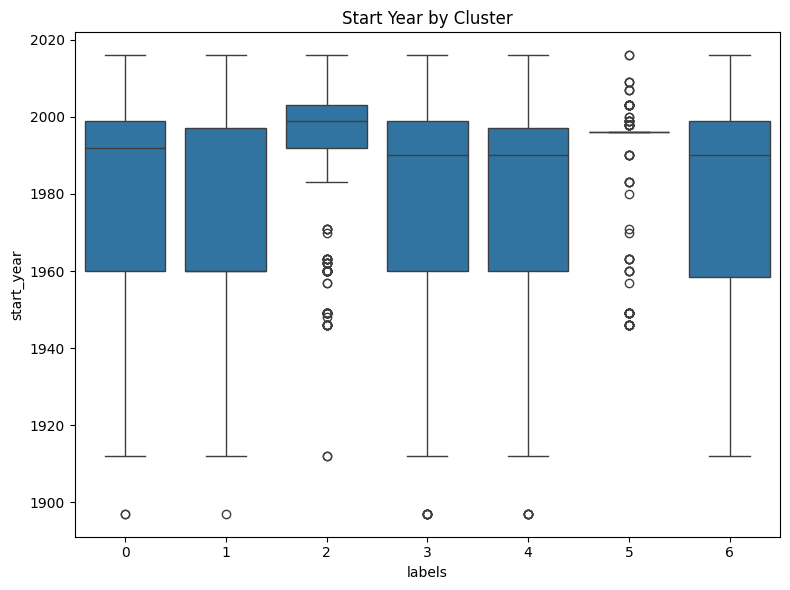


Length Statistics:
              mean         std  min   max
labels                                   
0       236.462611  229.545391   50  2551
1       210.802787  160.040257   50  1539
2       245.644320  203.073617   51  1687
3       320.302215  307.469343   50  2615
4       220.852645  192.283214   50  1370
5       139.063830  106.289113   50   850
6       220.472441  230.455065   50  1397


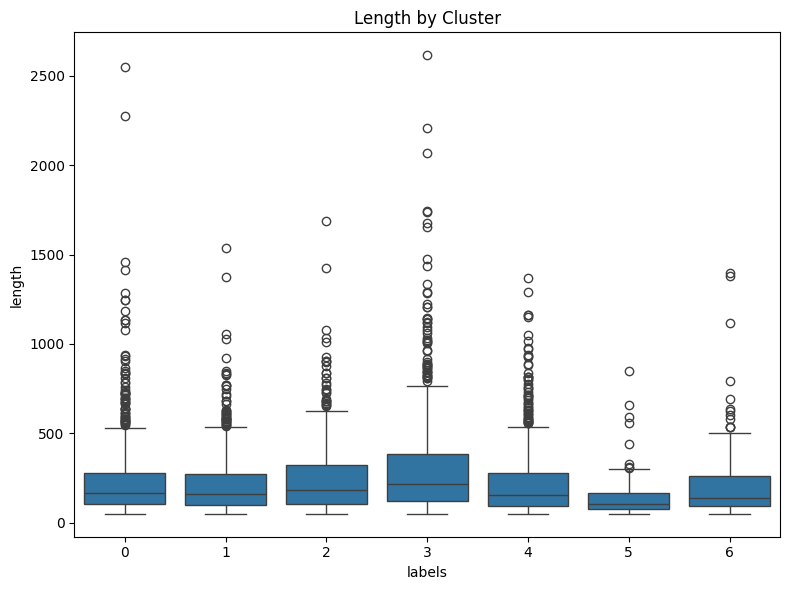


Gender Distribution by Cluster:
        gender_M  gender_F
labels                    
0            169       620
1            101       832
2             81       456
3            264       368
4            309       485
5             31       157
6             30        97


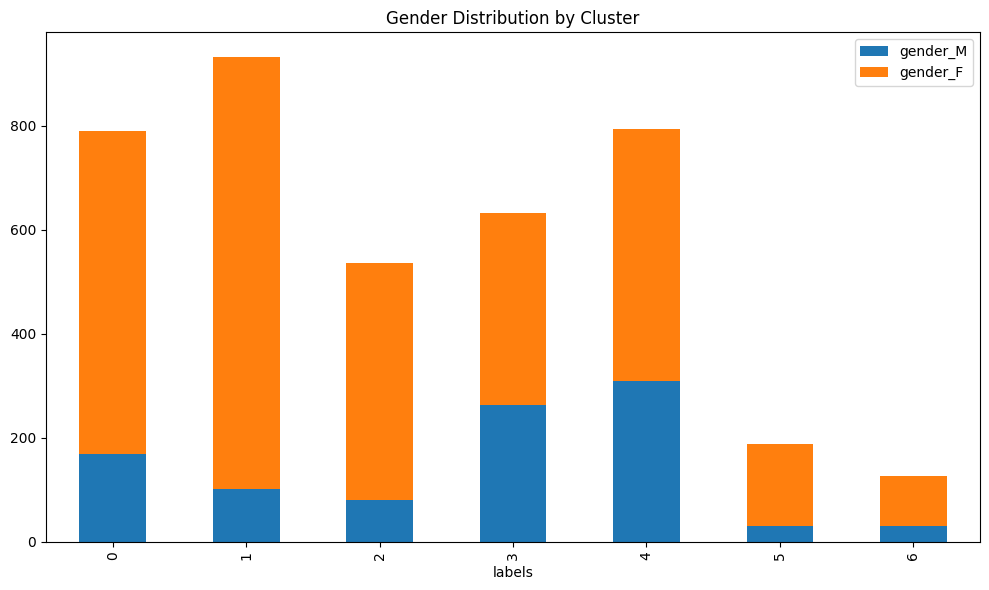


Emotion Distribution by Cluster:
emotion_feature   AN   AP   CO   HA   SD
labels                                  
0                157  245  168  121   98
1                171  291  157  196  118
2                148  171  103   59   56
3                 89  238  136  121   48
4                131  295  141  162   65
5                 25   48   25   74   16
6                  8   44   26   26   23


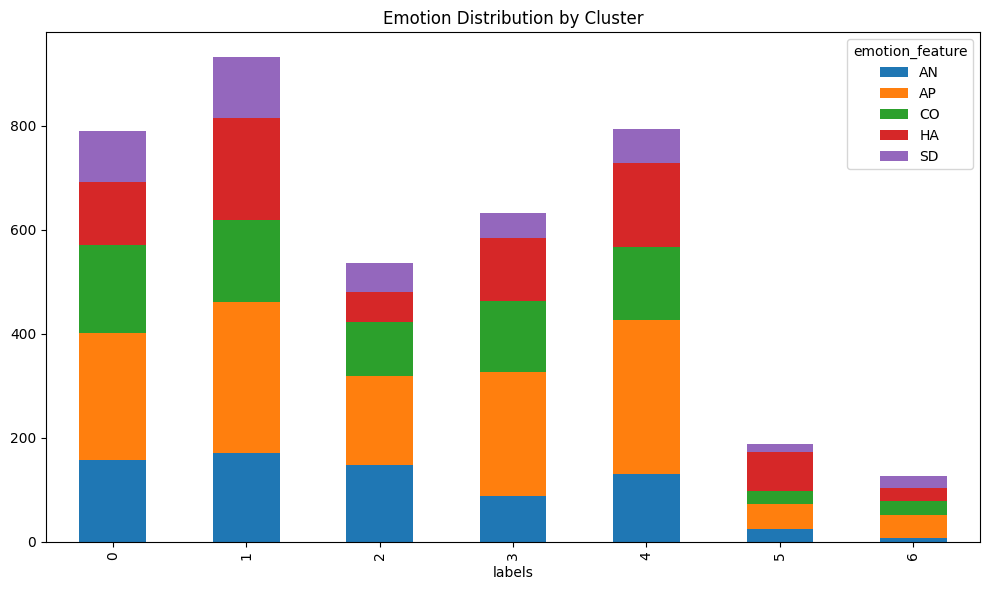

In [43]:

start_year_stats = df.groupby('labels')['start_year'].agg(['mean', 'std', 'min', 'max'])
print("Start Year Statistics:")
print(start_year_stats)

# Plot for 'start_year' by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='labels', y='start_year', data=df)
plt.title('Start Year by Cluster')
plt.tight_layout()
plt.show()

# -------------------
# Length: Statistics and Plot
# -------------------
# Calculate statistics for 'length' by cluster
length_stats = df.groupby('labels')['length'].agg(['mean', 'std', 'min', 'max'])
print("\nLength Statistics:")
print(length_stats)

# Plot for 'length' by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='labels', y='length', data=df)
plt.title('Length by Cluster')
plt.tight_layout()
plt.show()




# -------------------
# Gender Distribution by Cluster: Statistics and Plot
# -------------------
# Calculate the gender distribution in each cluster
gender_distribution = df.groupby('labels')[['gender_M', 'gender_F']].sum()
print("\nGender Distribution by Cluster:")
print(gender_distribution)

# Plot for gender distribution by cluster
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Cluster')
plt.tight_layout()
plt.show()



# -------------------
# Emotion Distribution by Cluster: Statistics and Plot
# -------------------
# Calculate the distribution of emotions across clusters
emotion_by_cluster = df.groupby('labels')['emotion_feature'].value_counts().unstack(fill_value=0)
print("\nEmotion Distribution by Cluster:")
print(emotion_by_cluster)

# Plot for emotion distribution by cluster
emotion_by_cluster.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Emotion Distribution by Cluster')
plt.tight_layout()
plt.show()

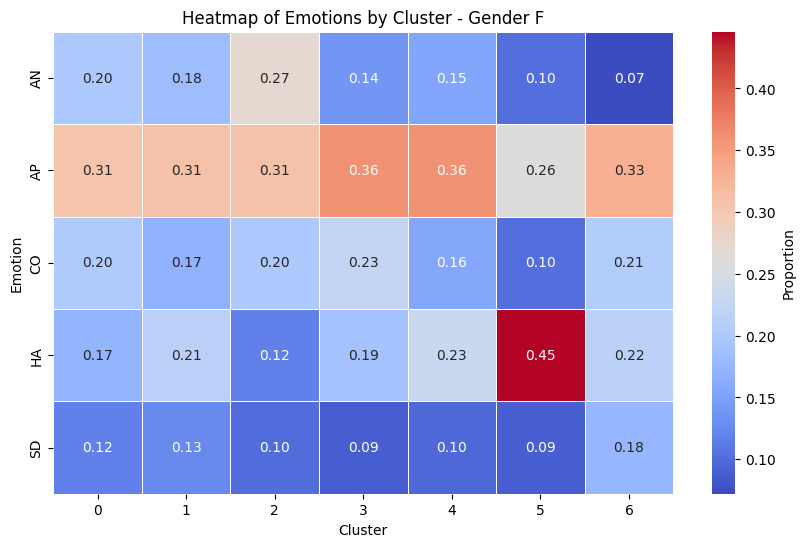

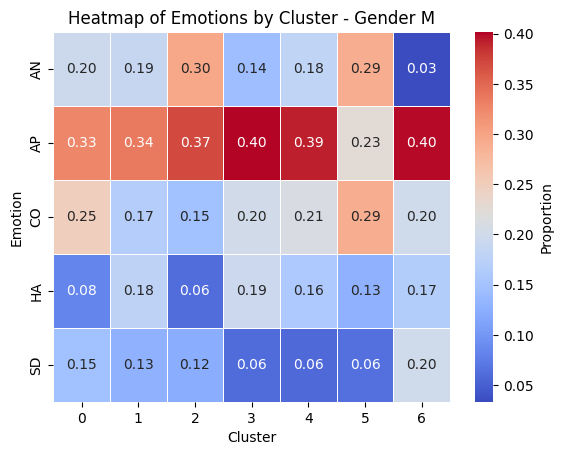

In [44]:
df_gender = df.groupby(['labels', 'emotion_feature', 'gender_F', 'gender_M']).size().reset_index(name='count')
df_gender['total'] = df_gender.groupby(['labels', 'gender_F', 'gender_M'])['count'].transform('sum')
df_gender['proportion'] = df_gender['count'] / df_gender['total']

# Plotting Heatmap
plt.figure(figsize=(10, 6))

# Heatmap for each gender
for gender in ['F', 'M']:
    df_gender_g = df_gender[df_gender[f'gender_{gender}'] == True]
    pivot_df = df_gender_g.pivot_table(index='emotion_feature', columns='labels', values='proportion', aggfunc='mean')

    sns.heatmap(pivot_df, annot=True, cmap="coolwarm", cbar_kws={'label': 'Proportion'}, fmt='.2f', linewidths=0.5)
    plt.title(f"Heatmap of Emotions by Cluster - Gender {gender}")
    plt.xlabel("Cluster")
    plt.ylabel("Emotion")
    plt.show()


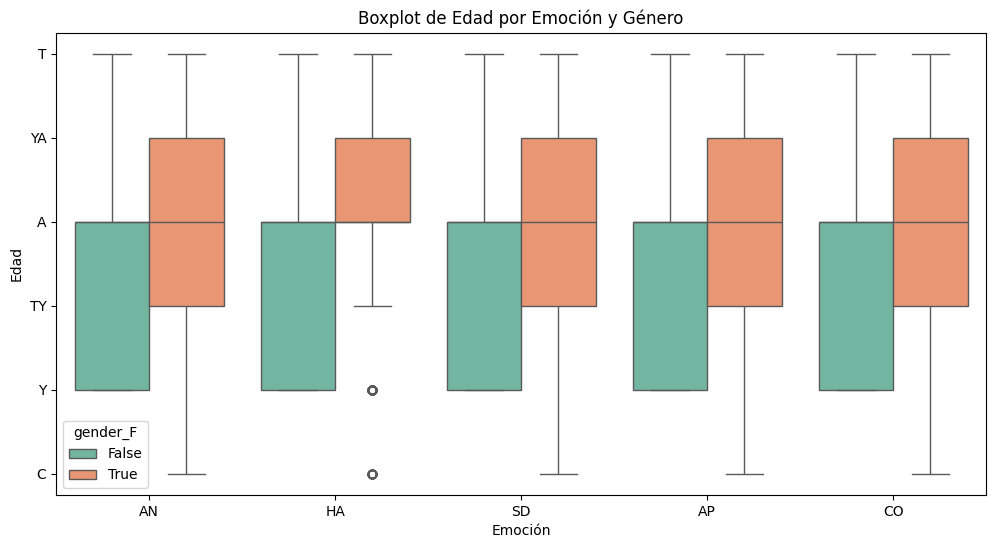

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='emotion_feature', y='age', hue='gender_F', data=df, palette="Set2")
plt.title("Boxplot de Edad por Emoción y Género")
plt.xlabel("Emoción")
plt.ylabel("Edad")
plt.show()


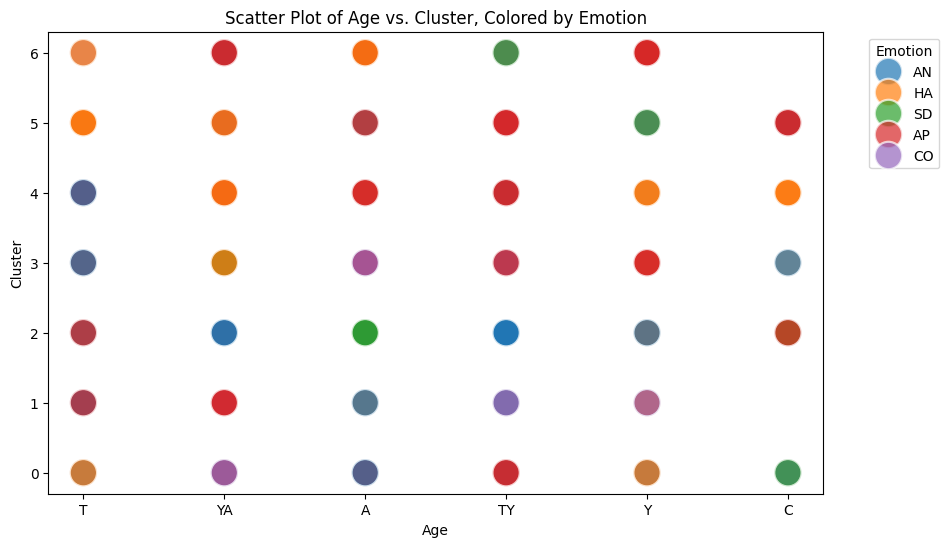

In [46]:
plt.figure(figsize=(10, 6))

# Assuming 'emotion_feature' is the column that contains emotions
sns.scatterplot(x='age', y='labels', hue='emotion_feature', data=df, palette="tab10", alpha=0.7, s=390)
plt.title("Scatter Plot of Age vs. Cluster, Colored by Emotion")
plt.xlabel("Age")
plt.ylabel("Cluster")
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


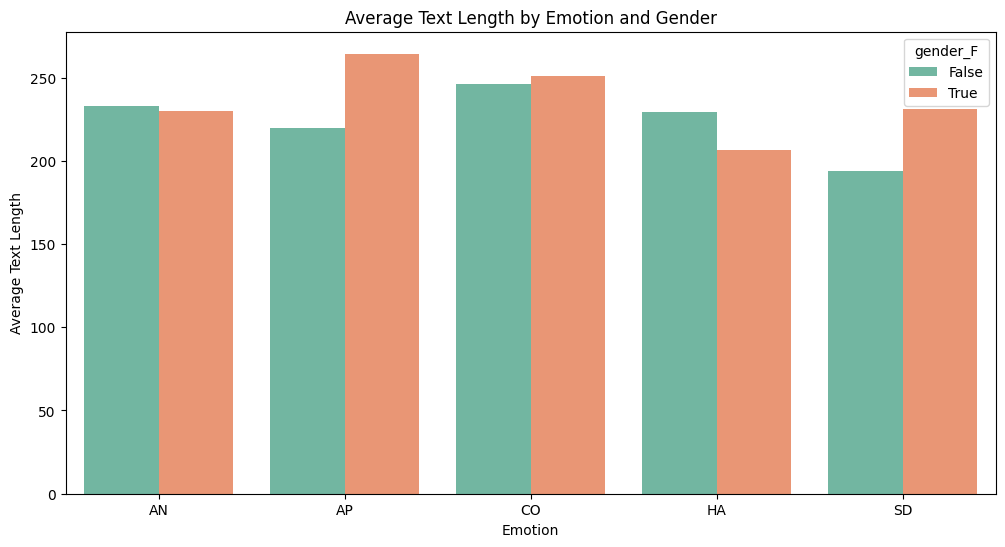

In [48]:
# Calculate the average text length by emotion and gender
df_length = df.groupby(['emotion_feature', 'gender_F']).agg({'length': 'mean'}).reset_index()

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='emotion_feature', y='length', hue='gender_F', data=df_length, palette="Set2")
plt.title("Average Text Length by Emotion and Gender")
plt.xlabel("Emotion")
plt.ylabel("Average Text Length")
plt.show()
